In [2]:
import json
import re
import pandas as pd
import string
import openpyxl
from rapidfuzz import fuzz
import regex

# Import JSON file
f = open('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/JPE/JPE_affiliation_output_1940_2010.json')
#f = open('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/RES/affs/RES_aff_output_1971_1979.json')#
json_data = json.load(f)

# Define Journal and Dataframe
Journal_Name = 'Journal of Political Economy'
Reference_Data_List = []

for key1, value1 in json_data.items():
    Article_ID = key1
    content_type = value1["content_type"]
    author_list = value1["authors"]
    authorscount = len(author_list)
    if len(author_list) == 1:
        author_1 = author_list[0]
        author_2 = ''
        author_3 = ''
        author_4 = ''
        author_5 = ''
        author_6 = ''
    elif len(author_list) == 2:
        author_1 = author_list[0]
        author_2 = author_list[1]
        author_3 = ''
        author_4 = ''
        author_5 = ''
        author_6 = ''
    elif len(author_list) == 3:
        author_1 = author_list[0]
        author_2 = author_list[1]
        author_3 = author_list[2]
        author_4 = ''
        author_5 = ''
        author_6 = ''
    elif len(author_list) == 4:
        author_1 = author_list[0]
        author_2 = author_list[1]
        author_3 = author_list[2]
        author_4 = author_list[3]
        author_5 = ''
        author_6 = ''
    elif len(author_list) == 5:
        author_1 = author_list[0]
        author_2 = author_list[1]
        author_3 = author_list[2]
        author_4 = author_list[3]
        author_5 = author_list[4]
        author_6 = ''
    else:
        author_1 = author_list[0]
        author_2 = author_list[1]
        author_3 = author_list[2]
        author_4 = author_list[3]
        author_5 = author_list[4]
        author_6 = author_list[5]

    author_1 = author_1.strip()
    author_2 = author_2.strip()
    author_3 = author_3.strip()
    author_4 = author_4.strip()
    author_5 = author_5.strip()
    author_6 = author_6.strip()

    #print(author_list)
    if len(author_list) > 1:
        authors = ",".join(author_list)
        
    else:
        authors = author_list[0]
        stable_url = value1["stable_url"]
    for key2 in value1["affiliations"]:
        Ref_type = key2
        if key2 == "found":
            ref_string = value1["affiliations"][key2]
            ref_string = ref_string.title()
            ref_string_1 = re.sub(r"[.*]","",ref_string)

            #reference_string_list = re.findall('\w+\s[\w.-]+\s*\w*\n',ref_string_1)
            reference_string_list = re.findall('.+',ref_string_1)
            #print(reference_string_list)
            #print(authorscount)

            #match = regex.search("("+author_1+"){e<=3}",reference_string_list[1])
            #match = re.search("(Frank H. Knight){e<=3}","Frank H. Knight")

            #print(match.group(0))
            # if regex.search("("+author_1+"){e<=3}",reference_string_list[1]) !=None:
            #     print("True")
            # else:
            #     print("false")

            while regex.search("("+author_1+"){e<=3}",reference_string_list[0]) == None:
                reference_string_list = reference_string_list[1:]
                if len(reference_string_list) == 0:
                    break
            
            ref_list_2 = []
            if reference_string_list != []:
                if len(reference_string_list) >= 2*authorscount:
                    for i in range(2*authorscount):
                        ref_list_2.append(reference_string_list[i])
                else:
                    ref_list_2 = reference_string_list
            
            #print(ref_list_2[0])
           # print(ref_list_2[1])


            if ref_list_2 != []:
                if authorscount == 1:
                    ref_list_2 = ref_list_2[0:2]
                elif authorscount == 2:
                    if len(ref_list_2) >=3:
                        if regex.search("("+author_2+"){e<=3}",ref_list_2[2]) != None:
                            ref_list_2 = ref_list_2[0:4]
                        else:
                            ref_list_2 = ref_list_2[0:2]
                    else:
                        ref_list_2 = ref_list_2[0:2]
                elif authorscount == 3:
                    if len(ref_list_2) >=5:
                        if regex.search("("+author_3+"){e<=3}",ref_list_2[4]) != None:
                            ref_list_2 = ref_list_2[0:6]
                        else:
                            ref_list_2 = ref_list_2[0:2]
                    else:
                        ref_list_2 = ref_list_2[0:2]
                else: 
                    ref_list_2 = ref_list_2[0:9]
                #print(ref_list_2)

            if authorscount == 2 and len(ref_list_2) == 2:
                auths = re.split(' And ',ref_list_2[0])
                affs  = re.split(' And ',ref_list_2[1])
                # if len(affs) == 1:
                #     affs  = re.split(',',ref_list_2[1])
                # if len(auths) == 1:
                #     auths = re.split(' And ',ref_list_2[0])
                #print(affs)
                if len(auths) == 2 and len(affs) == 2:
                    ref_list_2 = [auths[0],affs[0],auths[1],affs[1]]
                elif len(auths) == 2 and len(affs) ==1:
                    ref_list_2 = [auths[0],affs[0],auths[1],affs[0]]

            if authorscount == 3 and len(ref_list_2) == 2:
                auths = re.split(' And ',ref_list_2[0])
                affs  = re.split(' And ',ref_list_2[1])
                if len(affs) == 2:
                    affs2  = re.split(',',affs[0])
                if len(auths) == 2:
                    auths2 = re.split(' And ',auths[0])
                #print(affs)
                if len(auths) == 3 and len(affs) == 3:
                    ref_list_2 = [auths[0],affs[0],auths[1],affs[1],auths[2],affs[2]]
                elif len(auths) == 3 and len(affs) ==1:
                    ref_list_2 = [auths[0],affs[0],auths[1],affs[0],auths[2],affs[0]]
                if len(auths) == 2 and len(affs) == 2:
                    ref_list_2 = [auths[0],affs[0],auths[1],affs[1]]

                    
            
            reference_string_list = ref_list_2
            if len(reference_string_list) == 1:
                Author1 = reference_string_list[0]
                Affilliation1 = ''
                Author2 = ''
                Affilliation2 = ''
                Author3 = ''
                Affilliation3 = ''
                Author4 = ''
                Affilliation4 = ''
                Author5 = ''
                Affilliation5 = ''
                Author6 = ''
                Affilliation6 = ''
            elif len(reference_string_list) == 2:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = ''
                Affilliation2 = ''
                Author3 = ''
                Affilliation3 = ''
                Author4 = ''
                Affilliation4 = ''
                Author5 = ''
                Affilliation5 = ''
                Author6 = ''
                Affilliation6 = ''
            elif len(reference_string_list) == 3:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = ''
                Author3 = ''
                Affilliation3 = ''
                Author4 = ''
                Affilliation4 = ''
                Author5 = ''
                Affilliation5 = ''
                Author6 = ''
                Affilliation6 = ''
            elif len(reference_string_list) == 4:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = reference_string_list[3]
                Author3 = ''
                Affilliation3 = ''
                Author4 = ''
                Affilliation4 = ''
                Author5 = ''
                Affilliation5 = ''
                Author6 = ''
                Affilliation6 = ''
            elif len(reference_string_list) == 5:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = reference_string_list[3]   
                Author3 = reference_string_list[4]  
                Affilliation3 = ''
                Author4 = ''
                Affilliation4 = ''
                Author5 = ''
                Affilliation5 = '' 
                Author6 = ''
                Affilliation6 = ''
            elif len(reference_string_list) == 6:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = reference_string_list[3]   
                Author3 = reference_string_list[4]
                Affilliation3 = reference_string_list[5]     
                Author4 = ''
                Affilliation4 = ''
                Author5 = ''
                Affilliation5 = '' 
                Author6 = ''
                Affilliation6 = ''   
            elif len(reference_string_list) == 7:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = reference_string_list[3]   
                Author3 = reference_string_list[4]
                Affilliation3 = reference_string_list[5] 
                Author4 = reference_string_list[6]
                Affilliation4 = ''
                Author5 = ''
                Affilliation5 = ''
                Author6 = ''
                Affilliation6 = ''
            elif len(reference_string_list) == 8:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = reference_string_list[3]   
                Author3 = reference_string_list[4]
                Affilliation3 = reference_string_list[5] 
                Author4 = reference_string_list[6]
                Affilliation4 = reference_string_list[7]
                Author5 = ''
                Affilliation5 = ''
                Author6 = ''
                Affilliation6 = ''
            elif len(reference_string_list) == 9:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = reference_string_list[3]   
                Author3 = reference_string_list[4]
                Affilliation3 = reference_string_list[5] 
                Author4 = reference_string_list[6]
                Affilliation4 = reference_string_list[7]
                Author5 = reference_string_list[8]
                Affilliation5 = ''
                Author6 = ''
                Affilliation6 = ''
            elif len(reference_string_list) == 10:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = reference_string_list[3]   
                Author3 = reference_string_list[4]
                Affilliation3 = reference_string_list[5] 
                Author4 = reference_string_list[6]
                Affilliation4 = reference_string_list[7]
                Author5 = reference_string_list[8]
                Affilliation5 = reference_string_list[9]
                Author6 = ''
                Affilliation6 = ''
            elif len(reference_string_list) == 11:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = reference_string_list[3]   
                Author3 = reference_string_list[4]
                Affilliation3 = reference_string_list[5] 
                Author4 = reference_string_list[6]
                Affilliation4 = reference_string_list[7]
                Author5 = reference_string_list[8]
                Affilliation5 = reference_string_list[9]
                Author6 = reference_string_list[10]
                Affilliation6 = ''
            else:
                Author1 = ''
                Affilliation1 = ''
                Author2 = ''
                Affilliation2 = ''
                Author3 = ''
                Affilliation3 = ''
                Author4 = ''
                Affilliation4 = ''
                Author5 = ''
                Affilliation5 = ''
                Author6 = ''

            Author1 = Author1.strip()
            Affilliation1 = Affilliation1.strip()
            Author2 = Author2.strip()
            Affilliation2 = Affilliation2.strip() 
            Author3 = Author3.strip()
            Affilliation3 = Affilliation3.strip()
            Author4 = Author4.strip()
            Affilliation4 = Affilliation4.strip()
            Author5 = Author5.strip()
            Affilliation5 = Affilliation5.strip()
            Author6 = Author6.strip()
#            Affilliation6 = Affilliation6.strip()
# for i in range(1,7):
#     if author_(i) == 0
#     else: 
#         print(no)

    

    a1fuzz = fuzz.ratio(author_1,Author1)
    a2fuzz = fuzz.ratio(author_2,Author2)
                
    #print(Author1)
    Reference_Data_List.append({'Journal_Name' : Journal_Name, 'Article_ID' : Article_ID, 'content_type' : content_type,
    'authorscount':authorscount,
    'Authors' : authors, 'a1fuzz':a1fuzz,'a2fuzz':a2fuzz,
    'author_1':author_1, 'Author1':Author1,
    'author_2':author_2 , 'author_3':author_3, 'author_4':author_4, 'author_5':author_5 , 'author_6':author_6,
    #'stable_url' : stable_url, 
    'Ref_type': Ref_type, 
    'Author1':Author1, 'Affilliation1':Affilliation1, 'Author2':Author2,'Affilliation2':Affilliation2, 'Author3':Author3,'Affilliation3':Affilliation3,
    'Author4':Author4, 'Affilliation4':Affilliation4, 'Author5':Author5, 'Affilliation5':Affilliation5, 'Author6':Author6, 
    'ref_string':ref_string })

Reference_Data = pd.DataFrame.from_records(Reference_Data_List)     
Reference_Data.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/JPE_affiliation_output_1940_2010.xlsx')
#Reference_Data.to_excel('/Users/danaebouwer/Documents/Work/Matthew sheets/drive-download-20220901T140508Z-001/JPE/JPE_ref_output_2001_2010/JPE_ref_output_2001_2010.xlsx')

            


            #print(ref_list_2)


            # while fuzz.ratio(author_1,reference_string_list[0]) <30:
            #     #print(fuzz.ratio(author_1,reference_string_list[0]))
            #     reference_string_list = reference_string_list[1:]
            #     #print(author_1)
            #     #print(reference_string_list[0])
            #     #print(fuzz.ratio(author_1,reference_string_list[0]))
            #     if len(reference_string_list) == 0:
            #         break
            # ref_string_reference_string_list = reference_string_list[0:authorscount*2]


            # if re.findall(' and |,',reference_string_list[0]):
            #     x = re.split(' and', reference_string_list[0])
            #     reference_string_list[0] = x[0]
            #     if len(x) == 2:
            #         reference_string_list.append(x[1])
            

            
           # print(fuzz.ratio(author_1,reference_string_list[1]))
            #print(fuzz.ratio(author_1,reference_string_list[2]))

In [3]:
comb = Reference_Data.Affilliation1.value_counts()
comb

University Of Chicago                                                                       277
Massachusetts Institute Of Technology                                                       113
Harvard University                                                                           94
Princeton University                                                                         78
Stanford University                                                                          76
                                                                                           ... 
The Hebrew Univensity Of Jerusalem And Centre For Economic Policy Research                    1
Hebrew University Of Jerusalem And Center For Latin American Development Studies, Boston      1
University Of Missouri—Columbia                                                               1
Uniersity Of Delaware                                                                         1
Vienna                                  

In [4]:
Reference_Data

Journal_Name Article_ID content_type  authorscount  \
0     Journal of Political Economy   26549911      Article             2   
1     Journal of Political Economy   26549912      Article             2   
2     Journal of Political Economy   26549913      Article             2   
3     Journal of Political Economy   26549914      Article             3   
4     Journal of Political Economy   26549915      Article             1   
...                            ...        ...          ...           ...   
4322  Journal of Political Economy    1825909      Article             1   
4323  Journal of Political Economy    1825910      Article             1   
4324  Journal of Political Economy    1825911      Article             1   
4325  Journal of Political Economy    1825912      Article             1   
4326  Journal of Political Economy    1825913      Article             1   

                                                Authors      a1fuzz  a2fuzz  \
0                    Johannes Hörner, Andrzej Skrzypacz   93.333333   100.0   
1          Gabriel Chodorow-Reich, Loukas Karabarbounis  100.000000   100.0   
2                           David Gill, Victoria Prowse  100.000000   100.0   
3     Tobias J. Klein, Christian Lambertz, Konrad O....   96.551724   100.0   
4                                           David Mitch  100.000000   100.0   
...                                                 ...         ...     ...   
4322                                 Richard A. Harvill   97.142857   100.0   
4323                                    Beverly McAnear   93.333333   100.0   
4324                                    Otto Weinberger  100.000000   100.0   
4325                              Frank Traver De Vyver  100.000000   100.0   
4326                                       Gerhard Colm  100.000000   100.0   

                    author_1                 Author1              author_2  \
0            Johannes Hörner         Johannes Hórner     Andrzej Skrzypacz   
1     Gabriel Chodorow-Reich  Gabriel Chodorow-Reich  Loukas Karabarbounis   
2                 David Gill              David Gill       Victoria Prowse   
3            Tobias J. Klein          Tobias J Klein    Christian Lambertz   
4                David Mitch             David Mitch                         
...                      ...                     ...                   ...   
4322      Richard A. Harvill       Richard A Harvill                         
4323         Beverly McAnear         Beverly Mcanear                         
4324         Otto Weinberger         Otto Weinberger                         
4325   Frank Traver De Vyver   Frank Traver De Vyver                         
4326            Gerhard Colm            Gerhard Colm                         

      ...               Author2  \
0     ...     Andrzej Skrzypacz   
1     ...  Loukas Karabarbounis   
2     ...       Victoria Prowse   
3     ...    Christian Lambertz   
4     ...                         
...   ...                   ...   
4322  ...                         
4323  ...                         
4324  ...                         
4325  ...                         
4326  ...                         

                                          Affilliation2         Author3  \
0                                   Stanford University                   
1     University Of Minnesota And National Bureau Of...                   
2                                     Purdue University                   
3                                University Of Mannheim  Konrad O Stahl   
4                                                                         
...                                                 ...             ...   
4322                                                                      
4323                                                                      
4324                                                                      
4325                                                

In [5]:
list1 = ['1','2','3','4','5','6','7']
print(list1)
list1.insert(1,'5')
print(list1)
print(len(list1))

['1', '2', '3', '4', '5', '6', '7']
['1', '5', '2', '3', '4', '5', '6', '7']
8


In [6]:
import regex
x = regex.search("no{e<=4}","nttoi")
print(x.group(0))

nt


In [16]:
ref_list_2 = ['Antonio E Bernardo And Olivier Ledoit', 'University Of California, Los Angeles']
#print(i)
ref_list_2 = ['Patricia Daly, Ernest Olson, And Paul H Douglas',]
authorscount = 2
if authorscount == 2 and len(ref_list_2) == 2:
    auths = re.split(' And ',ref_list_2[0])
    affs  = re.split(' And ',ref_list_2[1])
    # if len(affs) == 1:
    #     affs  = re.split(',',ref_list_2[1])
    # if len(auths) == 1:
    #     auths = re.split(' And ',ref_list_2[0])
    print(affs)
    if len(auths) == 2 and len(affs) == 2:
        ref_list_2 = [auths[0],affs[0],auths[1],affs[1]]
    elif len(auths) == 2 and len(affs) ==1:
        ref_list_2 = [auths[0],affs[0],auths[1],affs[0]]

if authorscount == 3 and len(ref_list_2) == 2:
    auths = re.split(' And ',ref_list_2[0])
    affs  = re.split(' And ',ref_list_2[1])
    if len(affs) == 2:
         affs2  = re.split(',',affs[0])
    if len(auths) == 2:
         auths2 = re.split(' And ',auths[0])
    #print(affs)
    if len(auths) == 3 and len(affs) == 3:
        ref_list_2 = [auths[0],affs[0],auths[1],affs[1],auths[2],affs[2]]
    elif len(auths) == 3 and len(affs) ==1:
        ref_list_2 = [auths[0],affs[0],auths[1],affs[0],auths[2],affs[0]]

print(ref_list_2)

['Patricia Daly, Ernest Olson, And Paul H Douglas']


In [8]:
list1 = ['1','2','3']
authorscount = 2
ref_list_2 = []

for i in range(authorscount):
    ref_list_2.append(reference_string_list[i])

print(ref_list_2)

['Gerhard Colm', 'Washington, DC']


In [9]:
True_count = 0
False_count = 0
for item in Reference_Data['a1fuzz']:
    if item >75:
        True_count += 1
    else:
        False_count +=1
print(True_count)
print(False_count)
print(True_count/(True_count+False_count))

4016
311
0.9281257222093829


In [10]:
True_count = 0
False_count = 0
for item in Reference_Data['a2fuzz']:
    if item >75:
        True_count += 1
    else:
        False_count +=1
print(True_count)
print(False_count)
print(True_count/(True_count+False_count))

3998
329
0.9239657961636237


In [26]:
import pandas as pd

JPE_master = pd.read_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/JPE/JPE_processed.xlsx')
list = JPE_master.stable_url.str.split("/", expand = True)

for i in range(len(JPE_master)):
    if(list.iat[i,5] is None):
        list.iat[i,5] = list.iat[i,4]
        print(list.iat[0,5])
    else:
        list.iat[i,5] = list.iat[i,5]

JPE_master['Article_ID'] = list[5] 

print(JPE_master['Article_ID'] .head(10))
print(JPE_master.shape)

JPE_master = JPE_master.loc[JPE_master['content_type'] == 'Article']
print(JPE_master.shape)
JPE_master.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/JPE_master.xlsx')

26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
2

In [25]:
list[5]

0        26549909
1        26549910
2        26549911
3        26549912
4        26549913
           ...   
13926        None
13927        None
13928        None
13929        None
13930        None
Name: 5, Length: 13931, dtype: object

In [23]:
JPE_master = pd.read_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/JPE/JPE_processed.xlsx')
list = JPE_master.stable_url.str.split("/", expand = True)

#print(list.iat[0,5])
for i in range(30):
    if(list.iat[i,5] is None):
        list.iat[i,5] = list.iat[i,4]
        print(list.iat[0,5])
    else:
        list.iat[i,5] = list.iat[i,5]

JPE_master.head()
JPE_master.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/JPE_master.xlsx')
#print(list.iat[0,5])
#if list

26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909
26549909


for i in articles.index:
    if articles.loc[i,0]>=50:
        print(i[0])
        found=All[All['id']==i[0]]
        print(found['Jstor_journal'].values[0])
        print("D:\\docs\\Masters\\Data\\"+found['Jstor_journal'].values[0]+"_data\\"+i[0]+"_wo_cover.pdf")
        shell_process = subprocess.Popen(["D:\\docs\\Masters\\Data\\"+found['Jstor_journal'].values[0]+"_data\\"+i[0]+".pdf"],shell=True)
        content_type=input()
        clean_out_list.append({"id" : i[0],"content_type" : content

In [27]:
JPE_merged = pd.merge(Reference_Data, JPE_master,
on = 'Article_ID' , how = "inner" , indicator = True)

R1 = JPE_merged[JPE_merged['_merge']=='both']
R2 = JPE_merged[JPE_merged['_merge']=='left_only']
R3 = JPE_merged[JPE_merged['_merge']=='right_only']

print(JPE_merged.shape, R1.shape, R2.shape, R3.shape)
JPE_merged.head(5)
JPE_merged.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/JPE_merged.xlsx')


(4026, 39) (4026, 39) (0, 39) (0, 39)


In [28]:
comb2 = JPE_merged._merge.value_counts()
comb2

both          4026
left_only        0
right_only       0
Name: _merge, dtype: int64

In [29]:
new = JPE_merged[['year','Affilliation1','Affilliation2','Affilliation3','Affilliation4']]
new.head(5)
new.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/JPEaffdata.xlsx')

In [ ]:
comb2 = new.Affilliation1.value_counts()
comb2
# solution here

df_val_counts = pd.DataFrame(comb2)
df_value_counts_reset = df_val_counts.reset_index()
df_value_counts_reset.columns = ['unique_values', 'counts']
df_value_counts_reset.iat[0,0]
print(len(new.Affilliation1.value_counts()))

1409


In [74]:
print(list1.iloc[14,2].replace("And",""))

 National Bureau Of Economic Research


In [91]:
aff1 = JPE_merged[['year','Affilliation1']]

list1 = aff1.Affilliation1.str.split(", ", expand = True)

print(type(list1[2]))
aff1['aff11'] = list1[0] 
aff1['aff12'] = list1[1] 
#aff1['aff13'] = re.sub('And ', '',list1[2])
aff1['aff13'] = list1[2]

# Need to remove the and
#for i in range(len(aff1)):
#    if list1.iloc[i,2] is not None:
 #       print(list1.iloc[i,2])
  #      x = list1.iloc[i,2].replace("And","")
   #     aff1 = aff1.append({'aff13v2': x},ignore_index=True)

# Need to check if it contains an and
list2 = aff1.aff11.str.split("And", expand = True)

aff1['aff111'] = list2[0] 
aff1['aff112'] = list2[1] 
aff1['aff113'] = list2[2] 

list3 = aff1.aff12.str.split("And", expand = True)

aff1['aff121'] = list3[0] 
aff1['aff122'] = list3[1] 
aff1['aff123'] = list3[2] 

aff1final = aff1[['year','aff13','aff111','aff112','aff113','aff121','aff122','aff123']]


aff1.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/aff1v2.xlsx')
aff1final.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/aff1final.xlsx')


<class 'pandas.core.series.Series'>


/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_15439/3658594126.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aff1['aff11'] = list1[0]
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_15439/3658594126.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aff1['aff12'] = list1[1]
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_15439/3658594126.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [103]:
aff121 = aff1final[['year','aff121']]
aff121 = aff1final[['year','aff121']]

aff121v2 = pd.DataFrame()
for i in range(len(aff121)):
    if aff121.iat[i,1] is not None:
        aff121v2 = aff121v2.append({'year': aff121.iat[i,0], 'Affilliation':aff121.iat[i,1]},ignore_index=True)

print(aff121v2.shape)
print(aff121v2.head)

/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_15439/1588017910.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aff121v2 = aff121v2.append({'year': aff121.iat[i,0], 'Affilliation':aff121.iat[i,1]},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_15439/1588017910.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aff121v2 = aff121v2.append({'year': aff121.iat[i,0], 'Affilliation':aff121.iat[i,1]},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_15439/1588017910.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aff121v2 = aff121v2.append({'year': aff121.iat[i,0], 'Affilliation':aff121.iat[i,1]},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml91

(562, 2)
<bound method NDFrame.head of      year                         Affilliation
0    2016                     Baltimore County
1    2016  Centre For Economic Policy Research
2    2016                          Los Angeles
3    2016                University Of Glasgow
4    2016                         Hec Montreal
..    ...                                  ...
557  1940                             Berkeley
558  1940                                  D C
559  1940                              Chicago
560  1940                                   DC
561  1940                                   DC

[562 rows x 2 columns]>


/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_15439/1588017910.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aff121v2 = aff121v2.append({'year': aff121.iat[i,0], 'Affilliation':aff121.iat[i,1]},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_15439/1588017910.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aff121v2 = aff121v2.append({'year': aff121.iat[i,0], 'Affilliation':aff121.iat[i,1]},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_15439/1588017910.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aff121v2 = aff121v2.append({'year': aff121.iat[i,0], 'Affilliation':aff121.iat[i,1]},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml91

In [102]:
type(aff121.iat[1,1])

NoneType

In [104]:
# Merging the different affiliations together into 1 list
# Removing blanks in the affilitions
aff13 = aff1final[['year','aff13']]
aff13 = aff1final[['year','aff13']]

aff13v2 = pd.DataFrame()
for i in range(len(aff13)):
    if aff13.iat[i,1]  is not None:
        aff13v2 = aff13v2.append({'year': aff13.iat[i,0], 'Affilliation':aff13.iat[i,1]},ignore_index=True)

aff111 = aff1final[['year','aff111']]
aff111 = aff1final[['year','aff111']]

aff111v2 = pd.DataFrame()
for i in range(len(aff111)):
    if aff111.iat[i,1]  is not None:
        aff111v2 = aff111v2.append({'year': aff111.iat[i,0], 'Affilliation':aff111.iat[i,1]},ignore_index=True)

aff112 = aff1final[['year','aff112']]
aff112 = aff1final[['year','aff112']]

aff112v2 = pd.DataFrame()
for i in range(len(aff112)):
    if aff112.iat[i,1] is not None:
        aff112v2 = aff112v2.append({'year': aff112.iat[i,0], 'Affilliation':aff112.iat[i,1]},ignore_index=True)

aff113 = aff1final[['year','aff113']]
aff113 = aff1final[['year','aff113']]

aff113v2 = pd.DataFrame()
for i in range(len(aff113)):
    if aff113.iat[i,1]  is not None:
        aff113v2 = aff113v2.append({'year': aff113.iat[i,0], 'Affilliation':aff113.iat[i,1]},ignore_index=True)

aff121 = aff1final[['year','aff121']]
aff121 = aff1final[['year','aff121']]

aff121v2 = pd.DataFrame()
for i in range(len(aff121)):
    if aff121.iat[i,1]  is not None:
        aff121v2 = aff121v2.append({'year': aff121.iat[i,0], 'Affilliation':aff121.iat[i,1]},ignore_index=True)

aff122 = aff1final[['year','aff122']]
aff122 = aff1final[['year','aff122']]

aff122v2 = pd.DataFrame()
for i in range(len(aff122)):
    if aff122.iat[i,1]  is not None:
        aff122v2 = aff122v2.append({'year': aff122.iat[i,0], 'Affilliation':aff122.iat[i,1]},ignore_index=True)

aff123 = aff1final[['year','aff123']]
aff123 = aff1final[['year','aff123']]

aff123v2 = pd.DataFrame()
for i in range(len(aff123)):
    if aff123.iat[i,1]  is not None:
        aff123v2 = aff123v2.append({'year': aff123.iat[i,0], 'Affilliation':aff123.iat[i,1]},ignore_index=True)

#aff1v2.rename(columns={"year": "year", "Affilliation1": "Affilliation"}, inplace = True)
#print(aff1.head)

aff2 = JPE_merged[['year','Affilliation2']]
#aff2 = aff2.dropna(subset=['Affilliation2'])
#aff2.rename(columns={"year": "year", "Affilliation2": "Affilliation"},inplace = True)
aff2v2 = pd.DataFrame()
for i in range(len(aff2)):
    if aff2.iat[i,1] != '':
        aff2v2 = aff2v2.append({'year': aff2.iat[i,0], 'Affilliation':aff2.iat[i,1]},ignore_index=True)

aff3 = JPE_merged[['year','Affilliation3']]
#aff3.rename(columns={"year": "year", "Affilliation3": "Affilliation"},inplace = True)
aff3v2 = pd.DataFrame()
for i in range(len(aff3)):
    if aff3.iat[i,1] != '':
        aff3v2 = aff3v2.append({'year': aff3.iat[i,0], 'Affilliation':aff3.iat[i,1]},ignore_index=True)

aff4 = JPE_merged[['year','Affilliation4']]
#aff4.rename(columns={"year": "year", "Affilliation4": "Affilliation"},inplace = True)
aff4v2 = pd.DataFrame()
for i in range(len(aff4)):
    if aff4.iat[i,1] != '':
        aff4v2 = aff4v2.append({'year': aff4.iat[i,0], 'Affilliation':aff4.iat[i,1]},ignore_index=True)


#print(aff1.shape,aff2.shape)
#print(aff2.head)
df1 = aff1v2.append(aff2v2, ignore_index=True)
df2 = df1.append(aff3v2, ignore_index=True)
df3 = df2.append(aff4v2, ignore_index=True)
df4 = df3.append(aff111v2, ignore_index=True)
df5 = df4.append(aff13v2, ignore_index=True)
df6 = df5.append(aff112v2, ignore_index=True)
df7 = df6.append(aff113v2, ignore_index=True)
df8 = df7.append(aff121v2, ignore_index=True)
df9 = df8.append(aff122v2, ignore_index=True)
df10 = df9.append(aff123v2, ignore_index=True)
print(df10.shape)
print(df10.head)
df10.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/df10_pre_count.xlsx')

/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_15439/1537640073.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aff13v2 = aff13v2.append({'year': aff13.iat[i,0], 'Affilliation':aff13.iat[i,1]},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_15439/1537640073.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aff13v2 = aff13v2.append({'year': aff13.iat[i,0], 'Affilliation':aff13.iat[i,1]},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_15439/1537640073.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aff13v2 = aff13v2.append({'year': aff13.iat[i,0], 'Affilliation':aff13.iat[i,1]},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/

(10858, 2)
<bound method NDFrame.head of        year                                       Affilliation
0      2016                                    Yale University
1      2016  Harvard University And National Bureau Of Econ...
2      2016                                  Purdue University
3      2016                                 Tilburg University
4      2016           University Of Maryland, Baltimore County
...     ...                                                ...
10853  1968                         Louisiana State University
10854  1962                                        11 (Pp 127 
10855  1958                                                   
10856  1975                                           Econemic
10857  1962                                135) Were Inadvert-

[10858 rows x 2 columns]>


In [88]:
# Merging the different affiliations together into 1 list
# Removing blanks in the affilitions
aff1 = JPE_merged[['year','Affilliation1']]
aff1 = aff1.dropna(subset=['Affilliation1'])
aff1 = JPE_merged[['year','Affilliation1']]
aff1 = aff1.dropna(subset=['Affilliation1'])

aff1v2 = pd.DataFrame()
for i in range(len(aff1)):
    if aff1.iat[i,1] != '':
        aff1v2 = aff1v2.append({'year': aff1.iat[i,0], 'Affilliation':aff1.iat[i,1]},ignore_index=True)


aff2 = JPE_merged[['year','Affilliation2']]

aff2v2 = pd.DataFrame()
for i in range(len(aff2)):
    if aff2.iat[i,1] != '':
        aff2v2 = aff2v2.append({'year': aff2.iat[i,0], 'Affilliation':aff2.iat[i,1]},ignore_index=True)

aff3 = JPE_merged[['year','Affilliation3']]
#aff3.rename(columns={"year": "year", "Affilliation3": "Affilliation"},inplace = True)
aff3v2 = pd.DataFrame()
for i in range(len(aff3)):
    if aff3.iat[i,1] != '':
        aff3v2 = aff3v2.append({'year': aff3.iat[i,0], 'Affilliation':aff3.iat[i,1]},ignore_index=True)

aff4 = JPE_merged[['year','Affilliation4']]
#aff4.rename(columns={"year": "year", "Affilliation4": "Affilliation"},inplace = True)
aff4v2 = pd.DataFrame()
for i in range(len(aff4)):
    if aff4.iat[i,1] != '':
        aff4v2 = aff4v2.append({'year': aff4.iat[i,0], 'Affilliation':aff4.iat[i,1]},ignore_index=True)


#print(aff1.shape,aff2.shape)
#print(aff2.head)
df1 = aff1v2.append(aff2v2, ignore_index=True)
df2 = df1.append(aff3v2, ignore_index=True)
df3 = df2.append(aff4v2, ignore_index=True)
print(df3.shape)
print(df3.head)
df3.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/df3_pre_count.xlsx')

/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_15439/4237495101.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aff1v2 = aff1v2.append({'year': aff1.iat[i,0], 'Affilliation':aff1.iat[i,1]},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_15439/4237495101.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aff1v2 = aff1v2.append({'year': aff1.iat[i,0], 'Affilliation':aff1.iat[i,1]},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_15439/4237495101.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aff1v2 = aff1v2.append({'year': aff1.iat[i,0], 'Affilliation':aff1.iat[i,1]},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel

(5521, 2)
<bound method NDFrame.head of       year                                       Affilliation
0     2016                                    Yale University
1     2016  Harvard University And National Bureau Of Econ...
2     2016                                  Purdue University
3     2016                                 Tilburg University
4     2016           University Of Maryland, Baltimore County
...    ...                                                ...
5516  1988                                  Tulane University
5517  1985                             University Of Colorado
5518  1970                                        Carl Hemmer
5519  1954            Dealing With Hartford, Connecticut, And
5520  1942  Been Synthesized In A Plan For A Commodity Res...

[5521 rows x 2 columns]>


In [ ]:
new['year']
print(new.shape)
newer = new.loc[new['year'] == 1940]
print(newer.shape)

(4026, 5)
(39, 5)


In [93]:

testing = pd.DataFrame()
for i in range(1940,2017):
    #if new['year'] == 1940:
        #newer = new.loc[new['year'] == i]
        newer = df10.loc[df10['year'] == i]

        for x in range(len(newer.Affilliation.value_counts())):
            comb2 = newer.Affilliation.value_counts()
            comb2
            df_val_counts = pd.DataFrame(comb2)
            df_value_counts_reset = df_val_counts.reset_index()
            df_value_counts_reset.columns = ['unique_values', 'counts']
            a = df_value_counts_reset.iat[x,0]
            b = df_value_counts_reset.iat[x,1]
            testing = testing.append({'year': i, 'aff1':a, 'count':b},ignore_index=True)
            #testing[0] = testing[0].append(i)
            #print(i)
            #print(df_value_counts_reset.iat[x,0])
            #print(df_value_counts_reset.iat[x,1])
            #testing[1] = df_value_counts_reset.iat[x,0]
            #testing[2] = df_value_counts_reset.iat[x,1]

print(testing)


/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_15439/3732043707.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  testing = testing.append({'year': i, 'aff1':a, 'count':b},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_15439/3732043707.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  testing = testing.append({'year': i, 'aff1':a, 'count':b},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_15439/3732043707.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  testing = testing.append({'year': i, 'aff1':a, 'count':b},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_15439/3732043707.py:15: FutureWarning: The frame.append 

      year                                               aff1  count
0     1940                                New York University      8
1     1940                                    Duke University      6
2     1940                            University Of Minnesota      6
3     1940                              University Of Chicago      6
4     1940                                 Harvard University      4
...    ...                                                ...    ...
4758  2016                            University Of Edinburgh      1
4759  2016                   Universidad Carlos Iii De Madrid      1
4760  2016  University Of Missouri, Columbia And Institute...      1
4761  2016  Boston College And National Bureau Of Economic...      1
4762  2016                                Cornell University       1

[4763 rows x 3 columns]


/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_15439/3732043707.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  testing = testing.append({'year': i, 'aff1':a, 'count':b},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_15439/3732043707.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  testing = testing.append({'year': i, 'aff1':a, 'count':b},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_15439/3732043707.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  testing = testing.append({'year': i, 'aff1':a, 'count':b},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_15439/3732043707.py:15: FutureWarning: The frame.append 

In [ ]:
testing.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/testinggrouped.xlsx')

In [221]:
testing['aff_cum_counts'] = testing.groupby('aff1').cumcount()
testing.tail()
#testing.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/testinggrouped.xlsx')

#Grouping into a cumullative count
df10 = df10.sort_values(by=['year'])
df10['aff_cum_counts'] = df10.groupby('Affilliation').cumcount()
df10.tail()
df10.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/JPE_filtered_Finalv2_cumcount.xlsx')

In [106]:
df11 = df10.iloc[-30:,:]
df11.iat[2,0] 
df11.head()

year                                       Affilliation  aff_cum_counts
5283  2016                         University Of Pennsylvania             139
5284  2016                                Mcmaster University              19
5285  2016                                       Hec Montreal               1
5286  2016  University Of Kentucky And Institute For The S...               0
5287  2016                                Stanford University             175

In [109]:
df5 = pd.DataFrame()
df12 = df11.iloc[-30:,:]
for i in range(len(df12)):
    if df12.iat[i,2] >= 30:
        df5 = df5.append({'year': df12.iat[i,0], 'aff': df12.iat[i,1] ,'count': df12.iat[i,2]},ignore_index=True)

df5

/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_15439/472408469.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df5.append({'year': df12.iat[i,0], 'aff': df12.iat[i,1] ,'count': df12.iat[i,2]},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_15439/472408469.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df5.append({'year': df12.iat[i,0], 'aff': df12.iat[i,1] ,'count': df12.iat[i,2]},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_15439/472408469.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df5.append({'year': df12.iat[i,0], 'aff': df12.iat[i,1] ,'count': df12.iat[i,2]},ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjm

year                                    aff  count
0   2016             University Of Pennsylvania    139
1   2016                    Stanford University    175
2   2016                     Harvard University    214
3   2016  Massachusetts Institute Of Technology    239
4   2016             London School Of Economics     68
5   2016  Massachusetts Institute Of Technology    240
6   2016                     Harvard University    215
7   2016             London School Of Economics     69
8   2016                        Yale University    141
9   2016                    Harvard University      32
10  2016                      Purdue University     38
11  2016                 University Of Maryland     41
12  2016                    Columbia University    160
13  2016                    Harvard University      33
14  2016                    Columbia University    161
15  2016                    Stanford University    176
16  2016                        Yale University    142

In [211]:
dfsorted = df10.sort_values(by=['aff_cum_counts'])
dfsorted.tail(50)

highest_vals = df10.drop_duplicates(subset = ['Affilliation'], keep = 'last')
highest_vals_10 = highest_vals.nlargest(10,'aff_cum_counts')
highest_vals_10



year                           Affilliation  aff_cum_counts
19    2016                  University Of Chicago             554
4034  2016  Massachusetts Institute Of Technology             238
9701  2016   National Bureau Of Economic Research             225
5486  2016                     Harvard University             215
5564  2016               University Of California             188
4011  2016                    Stanford University             172
5552  2016                   Princeton University             169
9     2016                    Columbia University             157
0     2016                        Yale University             142
4037  2016             University Of Pennsylvania             137

In [218]:
print(highest_vals_10.iat[0,1])

a = df10.loc[(df10['Affilliation'] == highest_vals_10.iat[0,1])]
b = df10.loc[(df10['Affilliation'] == highest_vals_10.iat[1,1])]
c = df10.loc[(df10['Affilliation'] == highest_vals_10.iat[2,1])]
d = df10.loc[(df10['Affilliation'] == highest_vals_10.iat[3,1])]
e = df10.loc[(df10['Affilliation'] == highest_vals_10.iat[4,1])]
f = df10.loc[(df10['Affilliation'] == highest_vals_10.iat[5,1])]
g = df10.loc[(df10['Affilliation'] == highest_vals_10.iat[6,1])]
h = df10.loc[(df10['Affilliation'] == highest_vals_10.iat[7,1])]
i = df10.loc[(df10['Affilliation'] == highest_vals_10.iat[8,1])]
j = df10.loc[(df10['Affilliation'] == highest_vals_10.iat[9,1])]

University Of Chicago


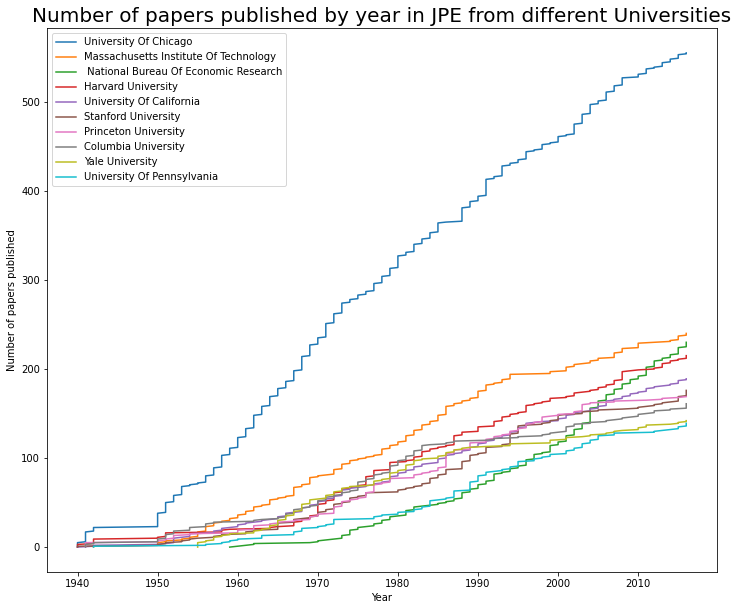

In [220]:
#Stacked plot on all years
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
plt.plot(a['year'],a['aff_cum_counts'], label = highest_vals_10.iat[0,1])
plt.plot(b['year'],b['aff_cum_counts'], label = highest_vals_10.iat[1,1])
plt.plot(c['year'],c['aff_cum_counts'], label = highest_vals_10.iat[2,1])
plt.plot(d['year'],d['aff_cum_counts'], label = highest_vals_10.iat[3,1])
plt.plot(e['year'],e['aff_cum_counts'], label = highest_vals_10.iat[4,1])
plt.plot(f['year'],f['aff_cum_counts'], label = highest_vals_10.iat[5,1])
plt.plot(g['year'],g['aff_cum_counts'], label = highest_vals_10.iat[6,1])
plt.plot(h['year'],h['aff_cum_counts'], label = highest_vals_10.iat[7,1])
plt.plot(i['year'],i['aff_cum_counts'], label = highest_vals_10.iat[8,1])
plt.plot(j['year'],j['aff_cum_counts'], label = highest_vals_10.iat[9,1])

plt.title('Number of papers published by year in JPE from different Universities', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of papers published')

plt.legend()
plt.show()

/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_15439/2008979979.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1940['aff_cum_counts'] = df1940.groupby('Affilliation').cumcount()


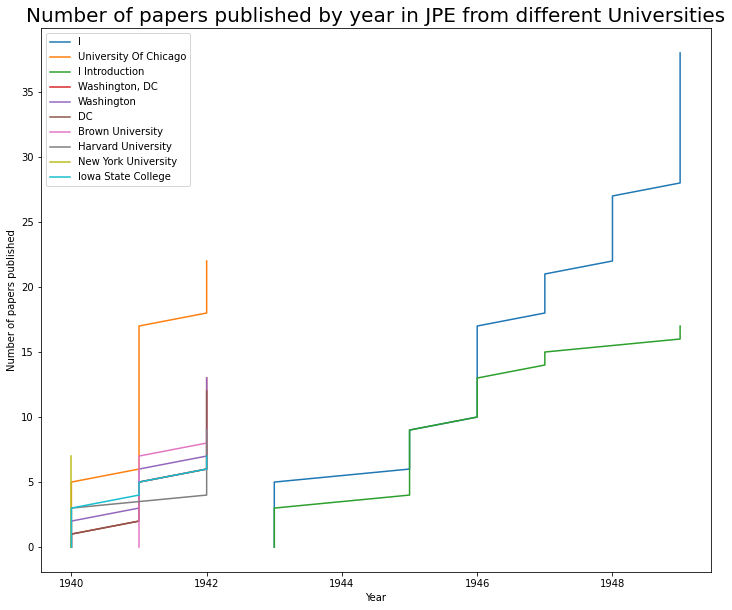

In [207]:
#1940 - 1950
#Grouping into a cumullative count
df10 = df10.sort_values(by=['year'])
df1940 = df10.loc[(df10['year'] >= 1940) & (df10['year'] < 1950)]
df1940['aff_cum_counts'] = df1940.groupby('Affilliation').cumcount()
df1940.tail()
df1940.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/df1940_Grouped.xlsx')

#Getting the highest values from the subset
highest_vals = df1940.drop_duplicates(subset = ['Affilliation'], keep = 'last')
highest_vals_10 = highest_vals.nlargest(10,'aff_cum_counts')
highest_vals_10

# Splitting out the highest values into data frames
a = df1940.loc[(df1940['Affilliation'] == highest_vals_10.iat[0,1])]
b = df1940.loc[(df1940['Affilliation'] == highest_vals_10.iat[1,1])]
c = df1940.loc[(df1940['Affilliation'] == highest_vals_10.iat[2,1])]
d = df1940.loc[(df1940['Affilliation'] == highest_vals_10.iat[3,1])]
e = df1940.loc[(df1940['Affilliation'] == highest_vals_10.iat[4,1])]
f = df1940.loc[(df1940['Affilliation'] == highest_vals_10.iat[5,1])]
g = df1940.loc[(df1940['Affilliation'] == highest_vals_10.iat[6,1])]
h = df1940.loc[(df1940['Affilliation'] == highest_vals_10.iat[7,1])]
i = df1940.loc[(df1940['Affilliation'] == highest_vals_10.iat[8,1])]
j = df1940.loc[(df1940['Affilliation'] == highest_vals_10.iat[9,1])]

#Stacked plot on all year
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
plt.plot(a['year'],a['aff_cum_counts'], label = highest_vals_10.iat[0,1])
plt.plot(b['year'],b['aff_cum_counts'], label = highest_vals_10.iat[1,1])
plt.plot(c['year'],c['aff_cum_counts'], label = highest_vals_10.iat[2,1])
plt.plot(d['year'],d['aff_cum_counts'], label = highest_vals_10.iat[3,1])
plt.plot(e['year'],e['aff_cum_counts'], label = highest_vals_10.iat[4,1])
plt.plot(f['year'],f['aff_cum_counts'], label = highest_vals_10.iat[5,1])
plt.plot(g['year'],g['aff_cum_counts'], label = highest_vals_10.iat[6,1])
plt.plot(h['year'],h['aff_cum_counts'], label = highest_vals_10.iat[7,1])
plt.plot(i['year'],i['aff_cum_counts'], label = highest_vals_10.iat[8,1])
plt.plot(j['year'],j['aff_cum_counts'], label = highest_vals_10.iat[9,1])

plt.title('Number of papers published by year in JPE from different Universities', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of papers published')

plt.legend()
plt.show()

/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_15439/4199484571.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1990['aff_cum_counts'] = df1990.groupby('Affilliation').cumcount()


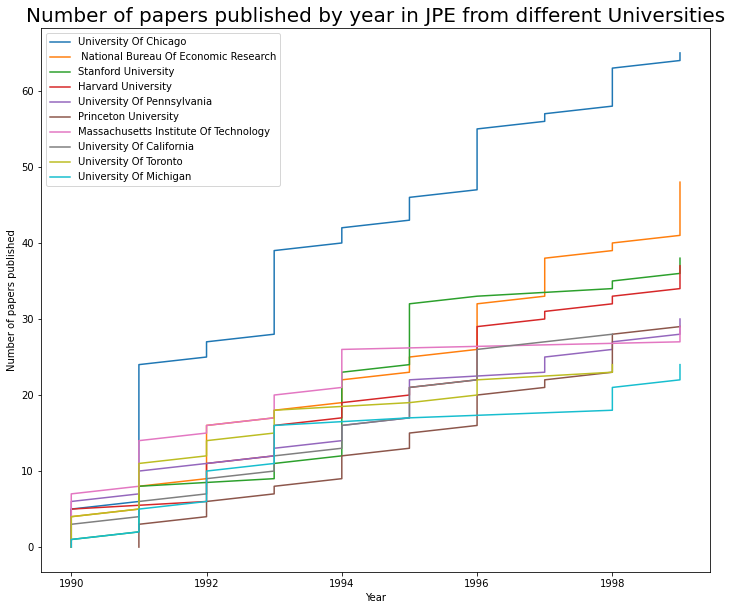

In [209]:
#1990 - 2000
#Grouping into a cumullative count
df10 = df10.sort_values(by=['year'])
df1990 = df10.loc[(df10['year'] >= 1990) & (df10['year'] < 2000)]
df1990['aff_cum_counts'] = df1990.groupby('Affilliation').cumcount()
df1990.tail()
df1990.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/df1990_Grouped.xlsx')

#Getting the highest values from the subset
highest_vals = df1990.drop_duplicates(subset = ['Affilliation'], keep = 'last')
highest_vals_10 = highest_vals.nlargest(10,'aff_cum_counts')
highest_vals_10

# Splitting out the highest values into data frames
a = df1990.loc[(df1990['Affilliation'] == highest_vals_10.iat[0,1])]
b = df1990.loc[(df1990['Affilliation'] == highest_vals_10.iat[1,1])]
c = df1990.loc[(df1990['Affilliation'] == highest_vals_10.iat[2,1])]
d = df1990.loc[(df1990['Affilliation'] == highest_vals_10.iat[3,1])]
e = df1990.loc[(df1990['Affilliation'] == highest_vals_10.iat[4,1])]
f = df1990.loc[(df1990['Affilliation'] == highest_vals_10.iat[5,1])]
g = df1990.loc[(df1990['Affilliation'] == highest_vals_10.iat[6,1])]
h = df1990.loc[(df1990['Affilliation'] == highest_vals_10.iat[7,1])]
i = df1990.loc[(df1990['Affilliation'] == highest_vals_10.iat[8,1])]
j = df1990.loc[(df1990['Affilliation'] == highest_vals_10.iat[9,1])]

#Stacked plot on all year
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
plt.plot(a['year'],a['aff_cum_counts'], label = highest_vals_10.iat[0,1])
plt.plot(b['year'],b['aff_cum_counts'], label = highest_vals_10.iat[1,1])
plt.plot(c['year'],c['aff_cum_counts'], label = highest_vals_10.iat[2,1])
plt.plot(d['year'],d['aff_cum_counts'], label = highest_vals_10.iat[3,1])
plt.plot(e['year'],e['aff_cum_counts'], label = highest_vals_10.iat[4,1])
plt.plot(f['year'],f['aff_cum_counts'], label = highest_vals_10.iat[5,1])
plt.plot(g['year'],g['aff_cum_counts'], label = highest_vals_10.iat[6,1])
plt.plot(h['year'],h['aff_cum_counts'], label = highest_vals_10.iat[7,1])
plt.plot(i['year'],i['aff_cum_counts'], label = highest_vals_10.iat[8,1])
plt.plot(j['year'],j['aff_cum_counts'], label = highest_vals_10.iat[9,1])

plt.title('Number of papers published by year in JPE from different Universities', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of papers published')

plt.legend()
plt.show()

/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_15439/2292977033.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2000['aff_cum_counts'] = df2000.groupby('Affilliation').cumcount()


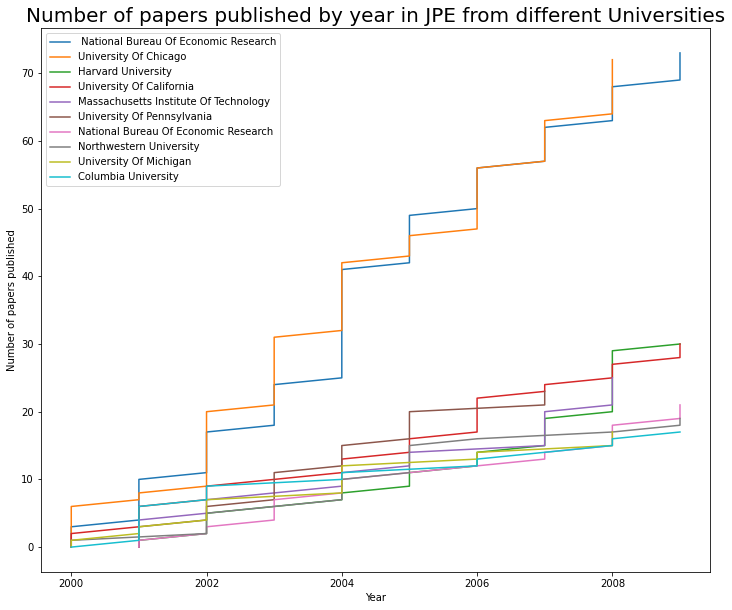

In [208]:
#2000 - 2010
#Grouping into a cumullative count
df10 = df10.sort_values(by=['year'])
df2000 = df10.loc[(df10['year'] >= 2000) & (df10['year'] < 2010)]
df2000['aff_cum_counts'] = df2000.groupby('Affilliation').cumcount()
df2000.tail()
df2000.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/df2000_Grouped.xlsx')

#Getting the highest values from the subset
highest_vals = df2000.drop_duplicates(subset = ['Affilliation'], keep = 'last')
highest_vals_10 = highest_vals.nlargest(10,'aff_cum_counts')
highest_vals_10

# Splitting out the highest values into data frames
a = df2000.loc[(df2000['Affilliation'] == highest_vals_10.iat[0,1])]
b = df2000.loc[(df2000['Affilliation'] == highest_vals_10.iat[1,1])]
c = df2000.loc[(df2000['Affilliation'] == highest_vals_10.iat[2,1])]
d = df2000.loc[(df2000['Affilliation'] == highest_vals_10.iat[3,1])]
e = df2000.loc[(df2000['Affilliation'] == highest_vals_10.iat[4,1])]
f = df2000.loc[(df2000['Affilliation'] == highest_vals_10.iat[5,1])]
g = df2000.loc[(df2000['Affilliation'] == highest_vals_10.iat[6,1])]
h = df2000.loc[(df2000['Affilliation'] == highest_vals_10.iat[7,1])]
i = df2000.loc[(df2000['Affilliation'] == highest_vals_10.iat[8,1])]
j = df2000.loc[(df2000['Affilliation'] == highest_vals_10.iat[9,1])]

#Stacked plot on all year
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
plt.plot(a['year'],a['aff_cum_counts'], label = highest_vals_10.iat[0,1])
plt.plot(b['year'],b['aff_cum_counts'], label = highest_vals_10.iat[1,1])
plt.plot(c['year'],c['aff_cum_counts'], label = highest_vals_10.iat[2,1])
plt.plot(d['year'],d['aff_cum_counts'], label = highest_vals_10.iat[3,1])
plt.plot(e['year'],e['aff_cum_counts'], label = highest_vals_10.iat[4,1])
plt.plot(f['year'],f['aff_cum_counts'], label = highest_vals_10.iat[5,1])
plt.plot(g['year'],g['aff_cum_counts'], label = highest_vals_10.iat[6,1])
plt.plot(h['year'],h['aff_cum_counts'], label = highest_vals_10.iat[7,1])
plt.plot(i['year'],i['aff_cum_counts'], label = highest_vals_10.iat[8,1])
plt.plot(j['year'],j['aff_cum_counts'], label = highest_vals_10.iat[9,1])

plt.title('Number of papers published by year in JPE from different Universities', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of papers published')

plt.legend()
plt.show()